In [1]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns

In [2]:
pd.merge?

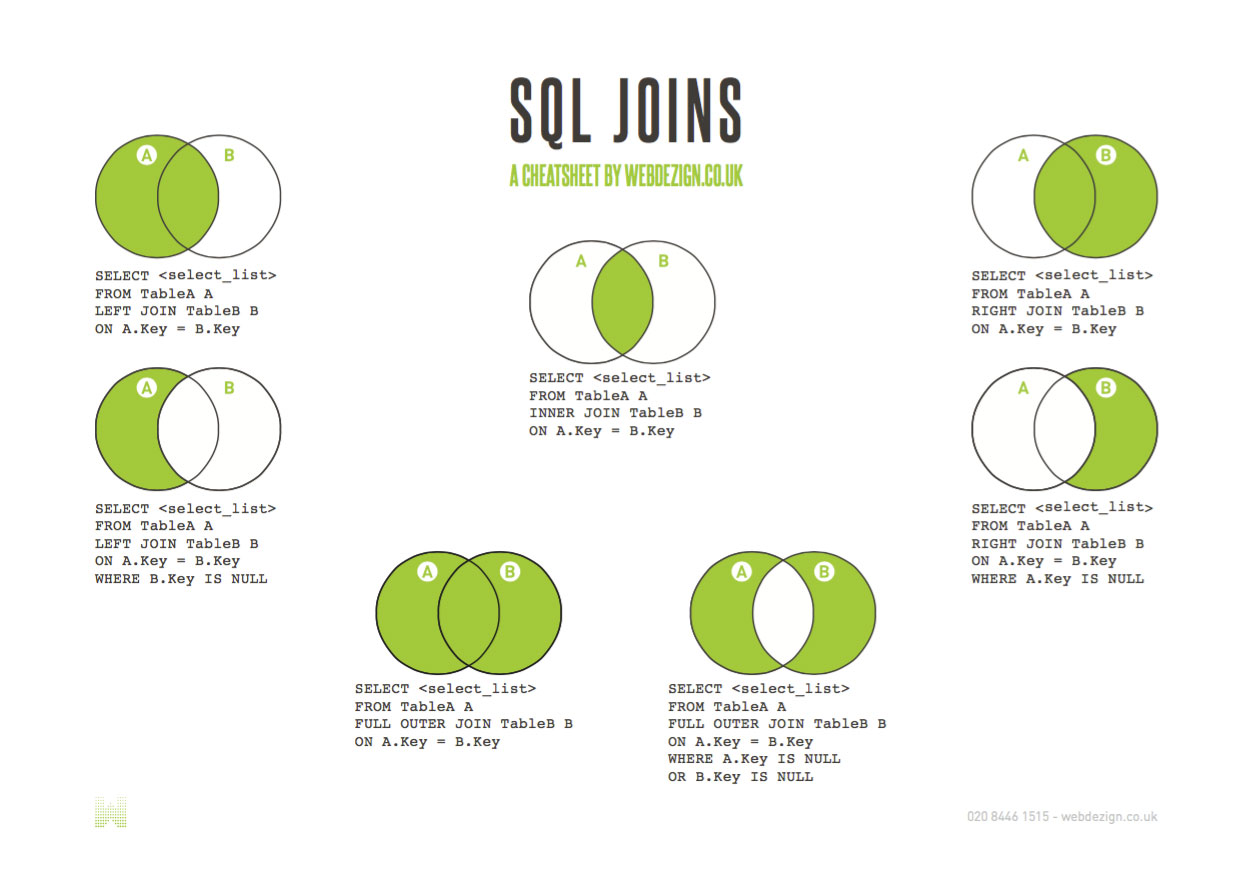

In [3]:
from IPython.display import Image
Image("https://adiyatmubarak.files.wordpress.com/2016/01/sql.jpg")


# 1. Merge
pandas.merge is similar to the _SQL join_ operations; it links rows of tables using one or more _keys_

Syntax:

`merge(df1, df2, 
       how='left', on='key', left_on=None, right_on=None, 
       left_index=False, right_index=False, 
       sort=True, copy=True,
       suffixes=('_x', '_y'))`


The syntax includes specifications of the following arguments

* **Which column to merge on;** 
    * the `on='key'` if the same key is in the two DFs, 
    * or `left_on='lkey', right_on='rkey'` if the keys have different names in the DFs 
    * Note: To merge on multiple keys, pass a list of column names
 
 
* **The nature of the join;** 
    * the `how=` option, with `left`, `right`, `outer`
    * By default, the merge is an `inner` join
    
 
* Tuple of string values to append to **overlapping column names** to identify them in the merged dataset
    * the `suffixes=` option
    * defaults to `('_x', '_y')`
    
 
* If you wish **to merge on the DF index**, pass `left_index=True` or `right_index=True` or both.


* Sort the result DataFrame by the join keys in lexicographical order or not;
    * `sort=` option; Defaults to True, setting to False will improve performance substantially in many cases
    
    
    
> _Note:_ For the **official Documentation** refer http://pandas.pydata.org/pandas-docs/dev/merging.html

In [4]:
# Let's define a few toy datasets to use as examples

df0 = DataFrame({'key': ['a', 'a', 'c', 'd', 'e'], 'data0': np.random.randint(0, 100, 5)})
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': np.random.randint(0, 100, 7)})
df2 = DataFrame({'key': ['a', 'b', 'd', 'f', 'g'], 'data1': np.random.randint(0, 100, 5)})

df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data3': np.random.randint(0, 100, 7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'], 'data4': np.random.randint(0, 100, 3)})



In [5]:
df0

,key,data0
0,a,15
1,a,91
2,c,33
3,d,3
4,e,20


In [6]:
df1

,key,data1
0,b,98
1,b,55
2,a,10
3,c,52
4,a,81
5,a,76
6,b,73


In [7]:
# 1. Default merge with no parameters


pd.merge(df0, df1,on='key',how='inner')

# We see that its an inner join by default (output key is the intersection of input keys)
# Merge happens on the column 'key' which is common to both datasets;
    # We could've written pd.merge(df1, df2, on='key', how='inner') to the same effect

,key,data0,data1
0,a,15,10
1,a,15,81
2,a,15,76
3,a,91,10
4,a,91,81
5,a,91,76
6,c,33,52


In [8]:
# Outer Join
pd.merge(df0, df2,on='key',how='outer')

,key,data0,data1
0,a,15.0,97.0
1,a,91.0,97.0
2,c,33.0,NaN
3,d,3.0,7.0
4,e,20.0,NaN
5,b,NaN,44.0
6,f,NaN,59.0
7,g,NaN,88.0


In [9]:
#pd.merge(df1, df4) 
# would yield an error because there are no matching column names to merge on 

In [10]:
df4

,rkey,data4
0,a,79
1,b,53
2,d,10


In [11]:
# 2. Specifying which columns to merge on (if keys have different names in datasets)

pd.merge(df1, df4, left_on='key', right_on='rkey')
# still an inner join!

,key,data1,rkey,data4
0,b,98,b,53
1,b,55,b,53
2,b,73,b,53
3,a,10,a,79
4,a,81,a,79
5,a,76,a,79


In [12]:
# 3. Specifying which type of join: outer

pd.merge(df1, df2, how='outer')
# the merged dataset will have a union of the keys, imputing NaNs where values aren't found

,key,data1
0,b,98
1,b,55
2,a,10
3,c,52
4,a,81
5,a,76
6,b,73
7,a,97
8,b,44
9,d,7


In [13]:
# 3.1 Try out a left join

dfx = pd.merge(df1, df2, how='left')

# value 'c' is absent in df2, so there will be a NaN in column data2

In [14]:
df1

,key,data1
0,b,98
1,b,55
2,a,10
3,c,52
4,a,81
5,a,76
6,b,73


In [15]:
df2

,key,data1
0,a,97
1,b,44
2,d,7
3,f,59
4,g,88


In [16]:
# Specifying suffixes to identify columns with the same name
pd.merge(df1, df2, on='key', suffixes=['_df1', '_df2'])

,key,data1_df1,data1_df2
0,b,98,44
1,b,55,44
2,b,73,44
3,a,10,97
4,a,81,97
5,a,76,97


------------------------------------------------------------------------------------------------------------------------------

In [24]:
DataFrame.join?

### 2. The `.join()` method

.join is a convenient **DataFrame method** for combining many DataFrames objects with the same or similar indexes but non-overlapping columns into a single result DataFrame.

By default, the `join` method performs a _left join_ on the join keys.

For simple **index-on-index merges** we can pass a list of DataFrames to `join.`

In [ ]:
#Merge = Inner join by default
#join = Left join

In [ ]:
#1.head(10)
#2.#rows - count 
a = 100
b = 50
output <= 100

In [21]:
df = DataFrame(np.random.randint(0, 50, 32).reshape(8, 4), columns=list('WXYZ'), index=list('abcdefgh'))

df1 = df.ix[2:, ['W', 'X']]
df2 = df.ix[:5, ['Y', 'Z']]


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [22]:
df1

,W,X
c,47,30
d,33,24
e,16,24
f,15,38
g,19,16
h,8,23


In [23]:
df2

,Y,Z
a,14,26
b,33,2
c,23,37
d,18,27
e,33,41


In [24]:
# Default actions is a left join on the indexes
df1.join(df2)

,W,X,Y,Z
c,47,30,23.0,37.0
d,33,24,18.0,27.0
e,16,24,33.0,41.0
f,15,38,NaN,NaN
g,19,16,NaN,NaN
h,8,23,NaN,NaN


In [25]:
pd.merge(df1, df2, how='left', 
         right_index=True, left_index=True)

,W,X,Y,Z
c,47,30,23.0,37.0
d,33,24,18.0,27.0
e,16,24,33.0,41.0
f,15,38,NaN,NaN
g,19,16,NaN,NaN
h,8,23,NaN,NaN


In [26]:
# We can alter the nature of the join by passing how=
df1.join(df2, how='outer')

,W,X,Y,Z
a,NaN,NaN,14.0,26.0
b,NaN,NaN,33.0,2.0
c,47.0,30.0,23.0,37.0
d,33.0,24.0,18.0,27.0
e,16.0,24.0,33.0,41.0
f,15.0,38.0,NaN,NaN
g,19.0,16.0,NaN,NaN
h,8.0,23.0,NaN,NaN


In [27]:
pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

,W,X,Y,Z
a,NaN,NaN,14.0,26.0
b,NaN,NaN,33.0,2.0
c,47.0,30.0,23.0,37.0
d,33.0,24.0,18.0,27.0
e,16.0,24.0,33.0,41.0
f,15.0,38.0,NaN,NaN
g,19.0,16.0,NaN,NaN
h,8.0,23.0,NaN,NaN


In [28]:
%timeit df1.join(df2, how='outer')

1.54 ms ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%timeit pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

1.66 ms ± 93.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
# Create a couple more DFs with the same index
df3 = df.ix[0:3, ['X', 'Z']]
df3.columns = ['P', 'Q']

df4 = df.ix[4:6, ['W']]
df4.columns = ['R']


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [31]:
# Merging multiple DFs with the same index by passing a list of names to .join
df1.join([df2, df3, df4])

,W,X,Y,Z,P,Q,R
c,47,30,23.0,37.0,30.0,37.0,NaN
d,33,24,18.0,27.0,NaN,NaN,NaN
e,16,24,33.0,41.0,NaN,NaN,16.0
f,15,38,NaN,NaN,NaN,NaN,15.0
g,19,16,NaN,NaN,NaN,NaN,NaN
h,8,23,NaN,NaN,NaN,NaN,NaN


In [32]:
df2.join([df1, df3, df4], how='outer')

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:6848: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Y,Z,W,X,P,Q,R
a,14.0,26.0,NaN,NaN,41.0,26.0,NaN
b,33.0,2.0,NaN,NaN,35.0,2.0,NaN
c,23.0,37.0,47.0,30.0,30.0,37.0,NaN
d,18.0,27.0,33.0,24.0,NaN,NaN,NaN
e,33.0,41.0,16.0,24.0,NaN,NaN,16.0
f,NaN,NaN,15.0,38.0,NaN,NaN,15.0
g,NaN,NaN,19.0,16.0,NaN,NaN,NaN
h,NaN,NaN,8.0,23.0,NaN,NaN,NaN


------------------------------------------------------------------------------------------------------------------------------

In [32]:
pd.concat?

## 3. Concatenating DataFrames 


In [33]:
# Create toy dataframes with non-overlapping indexes
df1 = DataFrame(np.random.randn(3, 3), index=list('abc'), columns=list('PRQ')) 
df2 = DataFrame(np.random.randn(2, 2), index=list('pq'), columns=list('PZ'))


In [34]:
df1

,P,R,Q
a,1.135308,0.499774,0.942321
b,-1.221614,-2.563849,-0.007630
c,-0.374985,1.193788,1.025873


In [35]:
df2

,P,Z
p,-0.933190,-1.034231
q,-1.418435,-0.046288


In [36]:
# No overlapping index
pd.concat([df1, df2], axis=0)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,P,Q,R,Z
a,1.135308,0.942321,0.499774,NaN
b,-1.221614,-0.007630,-2.563849,NaN
c,-0.374985,1.025873,1.193788,NaN
p,-0.933190,NaN,NaN,-1.034231
q,-1.418435,NaN,NaN,-0.046288


In [37]:
# Create toy dataframes with overlapping indexes
df1 = DataFrame(np.random.randn(9).reshape(3, 3), index=list('abc'), columns=list('XYZ')) 
df2 = DataFrame(np.random.randn(4).reshape(2, 2), index=list('ac'), columns=list('XZ'))

# When axis=0 there will still be 
pd.concat([df1, df2])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,X,Y,Z
a,-0.653081,-1.121571,0.091580
b,1.195913,-0.779071,0.280488
c,-0.755518,1.966451,0.148158
a,-0.833507,NaN,0.602522
c,-1.376358,NaN,-0.950706


In [38]:
df1

,X,Y,Z
a,-0.653081,-1.121571,0.091580
b,1.195913,-0.779071,0.280488
c,-0.755518,1.966451,0.148158


In [39]:
df2

,X,Z
a,-0.833507,0.602522
c,-1.376358,-0.950706


In [40]:
# Overlapping indexes will be merged
pd.concat([df1, df2], axis=1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,X,Y,Z,X,Z
a,-0.653081,-1.121571,0.091580,-0.833507,0.602522
b,1.195913,-0.779071,0.280488,NaN,NaN
c,-0.755518,1.966451,0.148158,-1.376358,-0.950706


In [41]:
pd.concat([df1, df2], axis=1, keys=['df_1', 'df_2'])
# This will create a hierarchical index

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


df_1                          df_2          
          X         Y         Z         X         Z
a -0.653081 -1.121571  0.091580 -0.833507  0.602522
b  1.195913 -0.779071  0.280488       NaN       NaN
c -0.755518  1.966451  0.148158 -1.376358 -0.950706

## 4. Use .append() method

In [42]:
# using append function
 
res = df1.append(df2)
res

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,X,Y,Z
a,-0.653081,-1.121571,0.091580
b,1.195913,-0.779071,0.280488
c,-0.755518,1.966451,0.148158
a,-0.833507,NaN,0.602522
c,-1.376358,NaN,-0.950706
